In [14]:
import os 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 파일 저장시 파일명의 용이성
def now_time():
    now = datetime.now()
    return now.strftime('%Y%m%d_%H_%M_%S')

# 각 모델별 비교 그래프
1. seq2dens
2. seq2seq with attention _ 14 corpus
3. seq2seq with attention _ 19 corpus

checkpoint_history/checkpoint_dense_lstm032_batch_64/
checkpoint_history/checkpoint_dense_lstm128_batch_64/
checkpoint_history/checkpoint_dense_lstm256_batch_64/


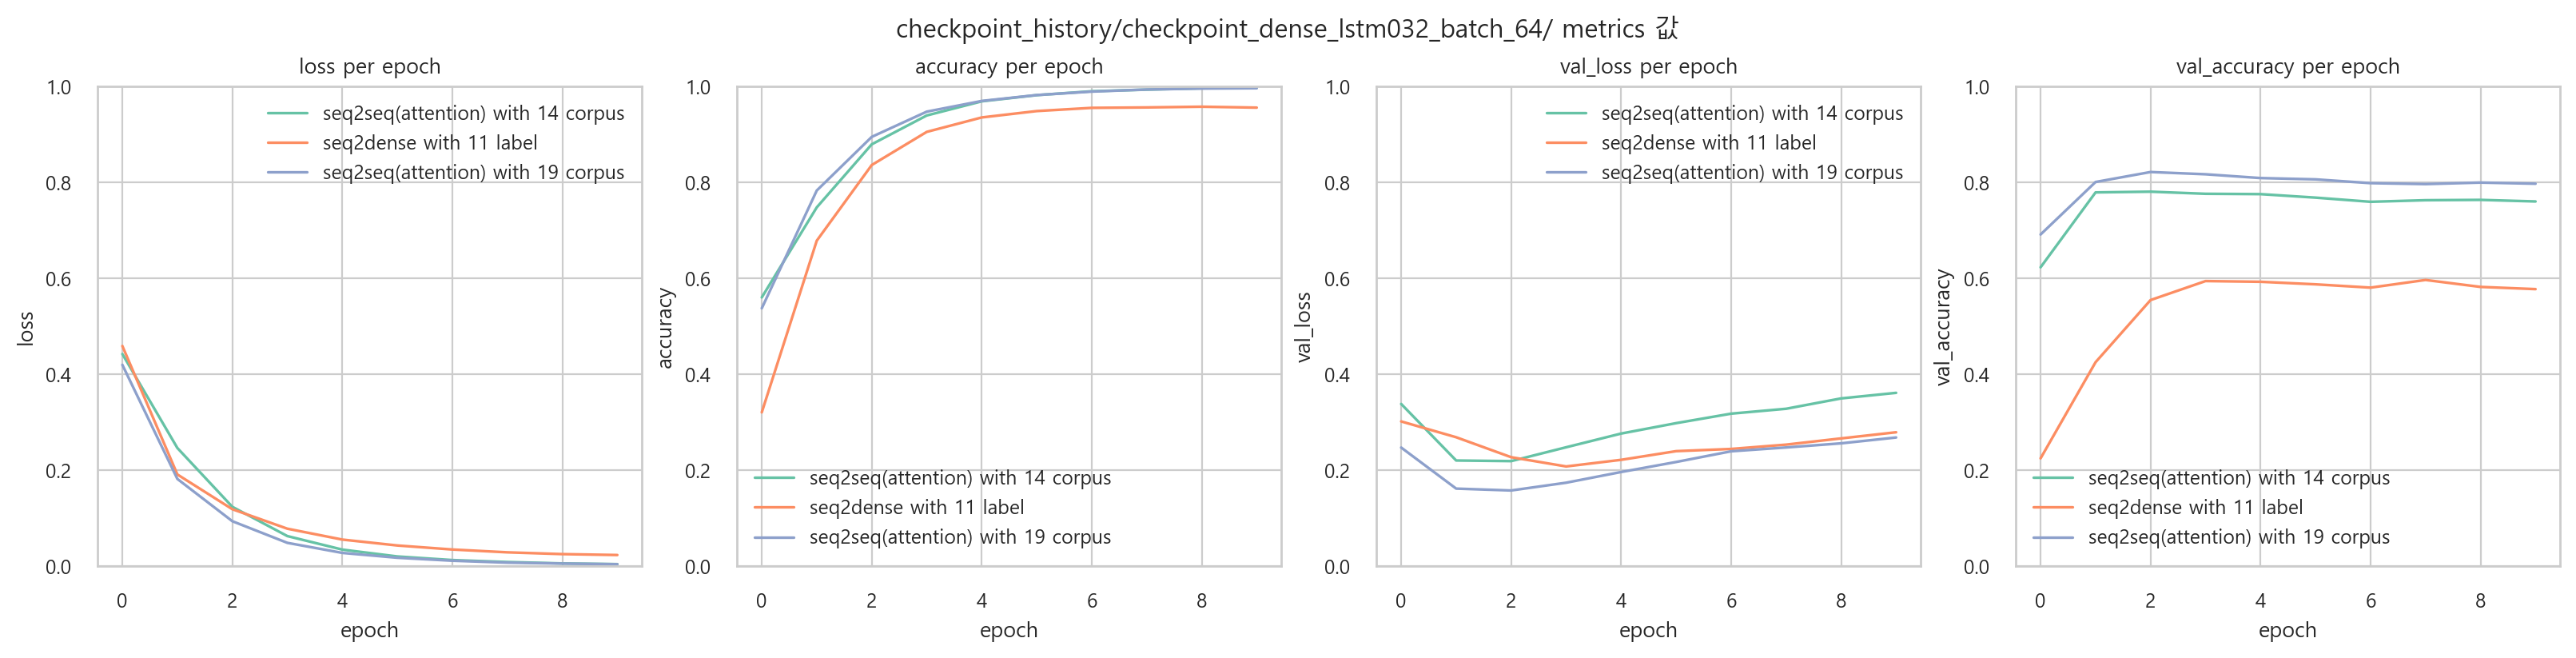

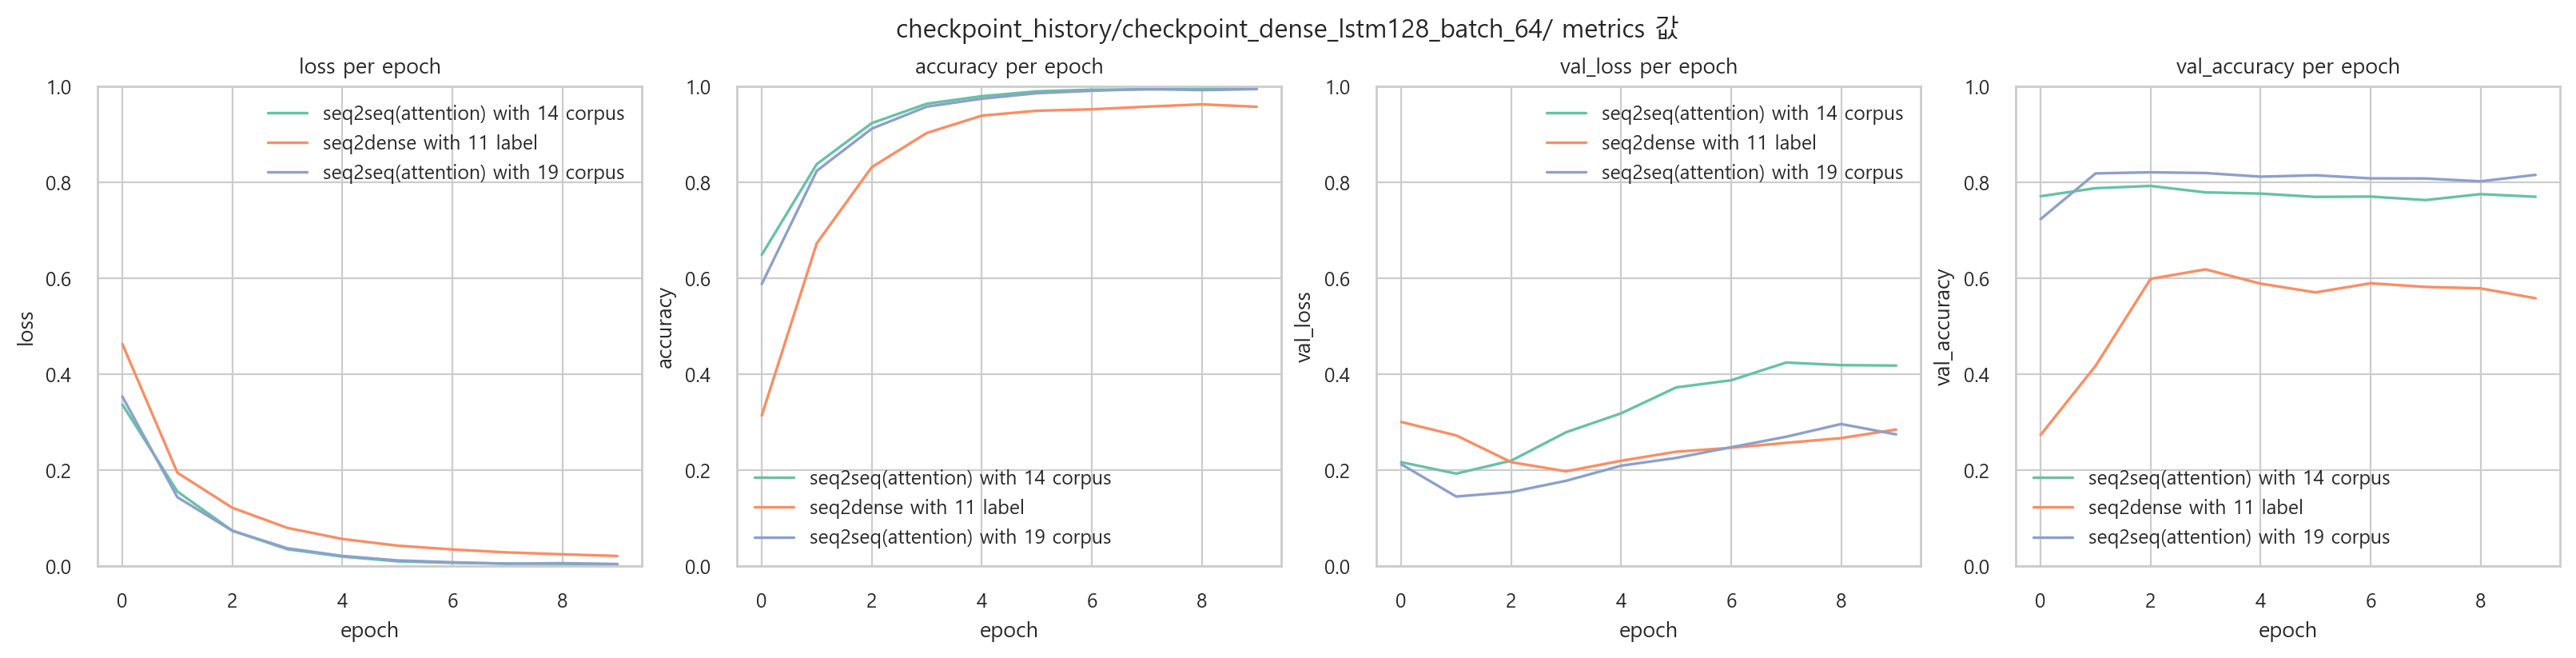

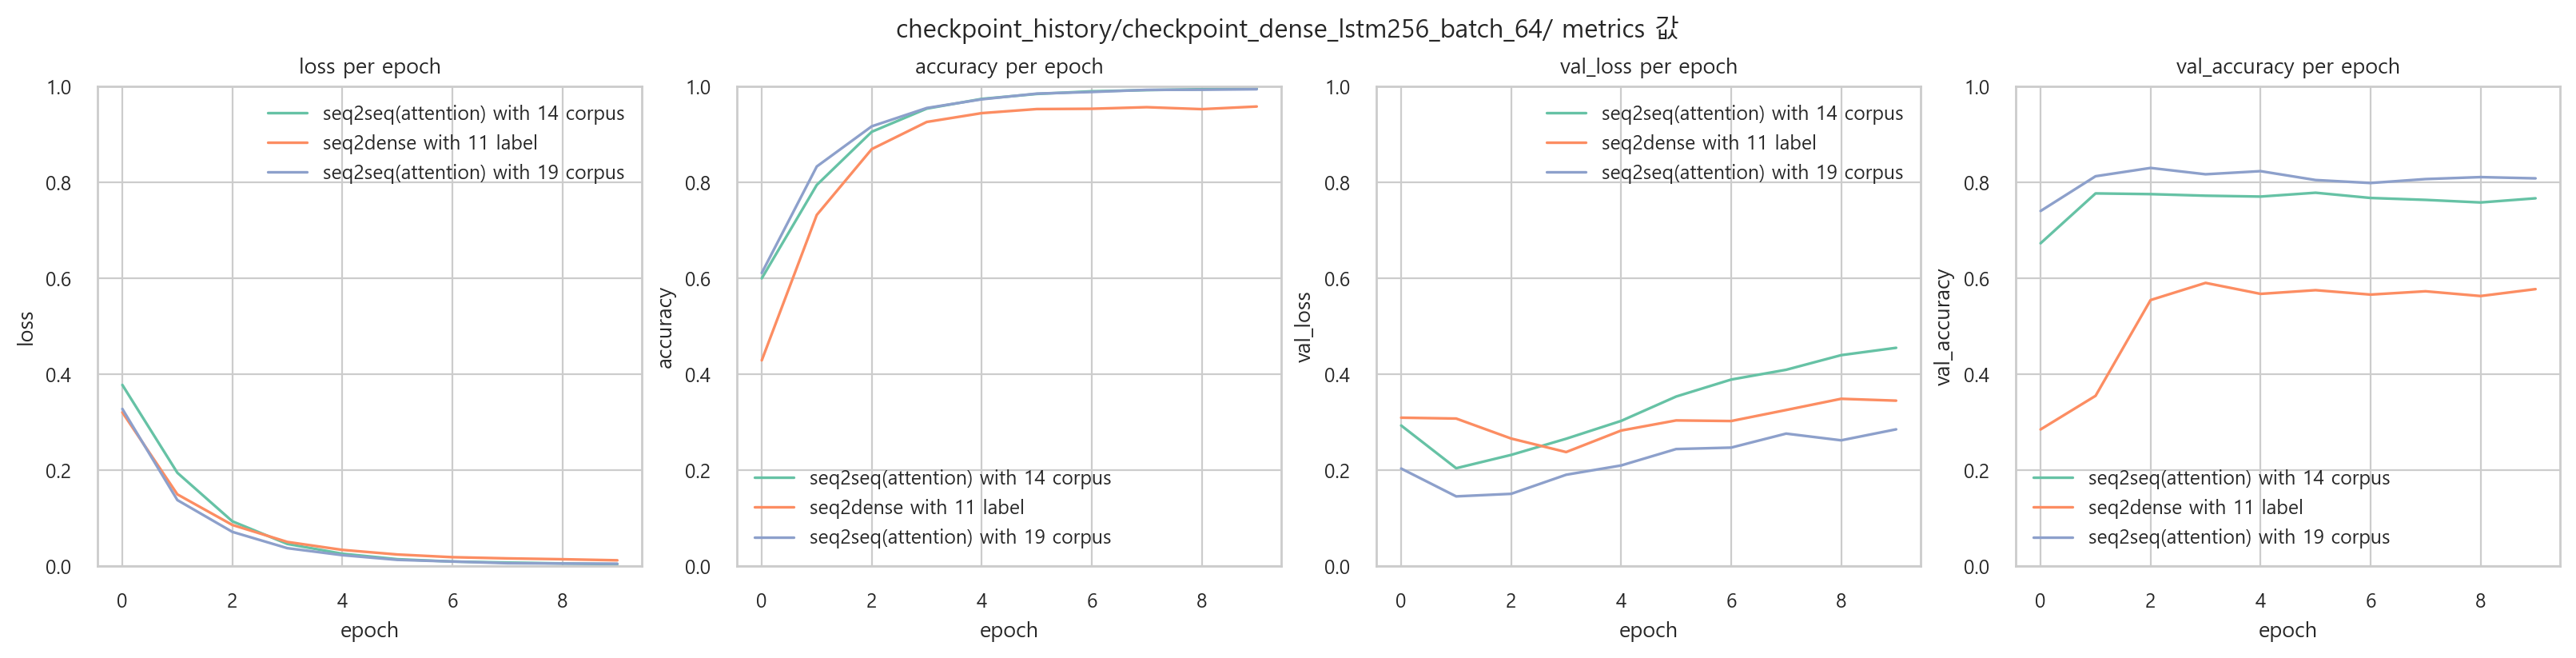

In [15]:
top_path = 'checkpoint_history/'
main_paths = [top_path+"checkpoint_dense_lstm032_batch_64/",top_path+"checkpoint_dense_lstm128_batch_64/",top_path+"checkpoint_dense_lstm256_batch_64/"]

for mp_ in main_paths:
    fig, ax = plt.subplots(1,4,figsize=(16,4))
    print(mp_)
    axes = ax.flatten()
    check_path = [mp_ + 'checkpoint_model1',mp_ + 'checkpoint_model2',mp_ + 'checkpoint_model3']
    check_path_name = ['seq2seq(attention) with 14 corpus','seq2dense with 11 label','seq2seq(attention) with 19 corpus']
    for p,n in zip(check_path,check_path_name):
        check_path_list = os.listdir(p)

        metric_dict_ = {'loss':[],
                        'accuracy':[],
                        'val_loss':[],
                        'val_accuracy':[]}

        for met in check_path_list:
            loss_, accuracy_, val_loss_, val_accuracy = met.replace('.h5','').split('metrics_')[1].split(',')
            metric_dict_['loss'].append(float(loss_))
            metric_dict_['accuracy'].append(float(accuracy_))
            metric_dict_['val_loss'].append(float(val_loss_))
            metric_dict_['val_accuracy'].append(float(val_accuracy))

        for ax_, metric_ in zip(axes,metric_dict_):
            sns.lineplot(metric_dict_[metric_], label = n,ax=ax_)
            ax_.set_xlabel("epoch")
            ax_.set_ylabel(metric_)
            ax_.set_ylim(0,1)
            ax_.set_title(f"{metric_} per epoch")
    fig.suptitle(f'{mp_} metrics 값');
    # plt.savefig(mp_.replace("/", '') + "plot.png")
    name_to_save = mp_.replace(('checkpoint_history/checkpoint_dense_lstm'),'').replace('/','')
    # plt.savefig(f"노드수(lstm,dense)_{name_to_save}plot.pdf")


### 최적의 파라미터 찾기 및 그래프

In [107]:
# 결과 데이터 불러오기
import pickle

### 히스토리 불러오기
# load data
with open('findout_best_param_for_graph_metrics/_test_1/historys_val_loss.pickle', 'rb') as fr:
    historys_val_loss_1 = pickle.load(fr)

with open('findout_best_param_for_graph_metrics/_test_1/historys_val_accu.pickle', 'rb') as fr:
    historys_val_accu_1 = pickle.load(fr)

with open('findout_best_param_for_graph_metrics/_test_2/historys_val_loss.pickle', 'rb') as fr:
    historys_val_loss_2 = pickle.load(fr)

with open('findout_best_param_for_graph_metrics/_test_2/historys_val_accu.pickle', 'rb') as fr:
    historys_val_accu_2 = pickle.load(fr)

In [108]:
all_loss_ = {**historys_val_loss_1,**historys_val_loss_2}
all_accu_ = {**historys_val_accu_1,**historys_val_accu_2}

# 최소의 loss값과 최대의 accuracy 값의 각각 그래프 그려보기

In [110]:
_min_loss = 1
_max_accu = 0
for i in all_loss_:
    if min(all_loss_[i]) < _min_loss:
        _min_loss = min(all_loss_[i])
        _min_loss_name = i

for i in all_accu_:
    if min(all_accu_[i]) > _max_accu:
        _max_accu = min(all_accu_[i])
        _max_accu_name = i

embedding_size1=2048, embedding_size2=2048, lstm_size=1024, dropout_ratio=0.6 - 손실값이 가장 낮은 모델
embedding_size1=2048, embedding_size2=2048, lstm_size=2048, dropout_ratio=0.2 - 정확도가 가장 높은 모델


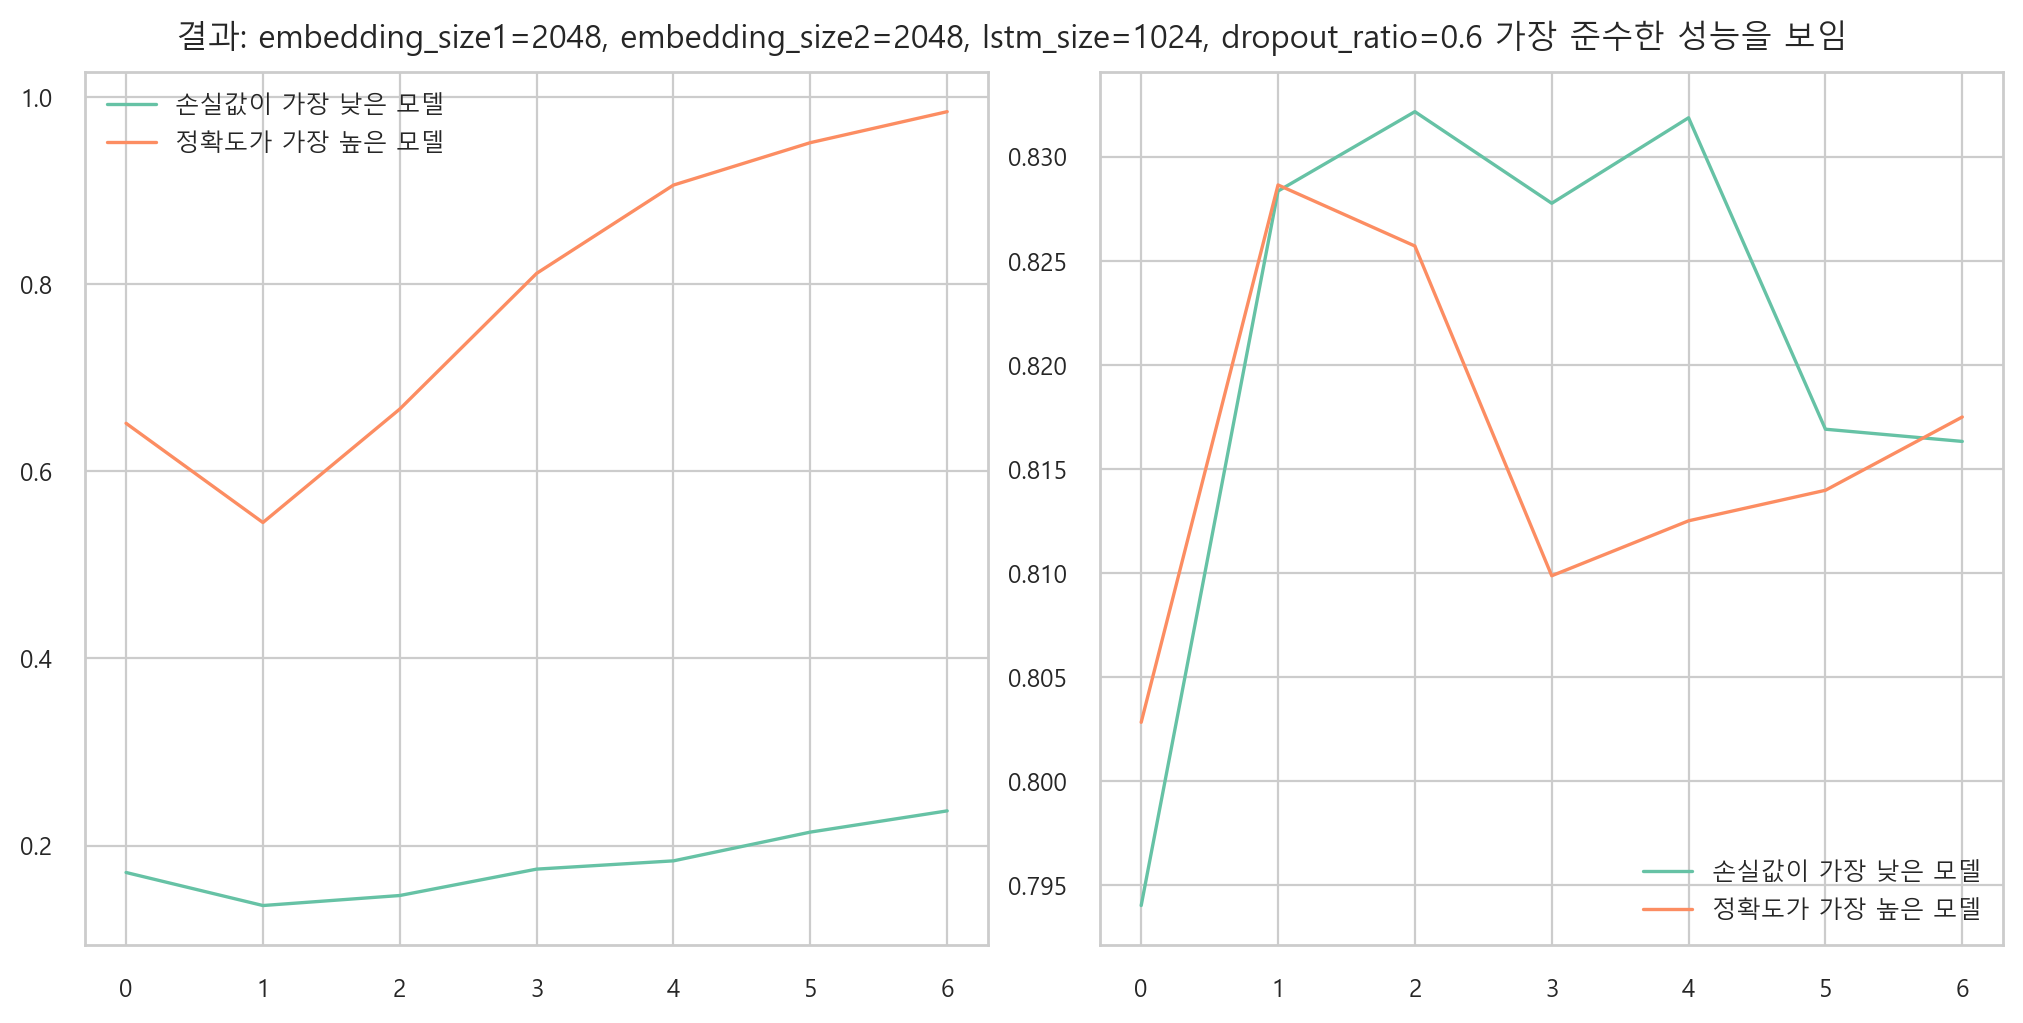

In [123]:
# 단순히 val 정확도가 높은 파라미터의 모델과, 손실값이 낮은 하이퍼 퍼라미터의 모델 비교
compare_which = [_min_loss_name, _max_accu_name]

fig, ax = plt.subplots(1,2,figsize = (10,5))
for _parapms_, indicate_ in zip(compare_which,['손실값이 가장 낮은 모델','정확도가 가장 높은 모델']):
    sns.lineplot(all_loss_[_parapms_], label = indicate_,ax=ax[0])
    sns.lineplot(all_accu_[_parapms_], label = indicate_,ax=ax[1])
    ax_.set_xlabel("epoch")
    ax_.set_ylabel(metric_)
    ax_.set_ylim(0,1)
    ax_.set_title(f"{metric_} per epoch")
    print(_parapms_,'-',indicate_)
fig.suptitle('결과: embedding_size1=2048, embedding_size2=2048, lstm_size=1024, dropout_ratio=0.6 가장 준수한 성능을 보임')
fig.savefig('final_params.pdf')
# embedding_size1=2048, embedding_size2=2048, lstm_size=1024, dropout_ratio=0.6 - 손실값이 가장 낮은 모델 이 좋은 성능을 보임